## Setup ##

In [1]:
"""Visualize embeddings produced"""
import numpy as np
import tensorflow as tf 
import h5py
import matplotlib.pyplot as plt
import os

from skimage import measure

import utils

%load_ext autoreload
%autoreload 2

os.environ['CUDA_VISIBLE_DEVICES'] = '1'

ROOT = '/usr/people/kluther/Projects/metric_segmentation/'

In [2]:
%%javascript
require(
        ["notebook/js/outputarea"],
        function (oa) {
            oa.OutputArea.auto_scroll_threshold = -1;
            console.log("Setting auto_scroll_threshold to -1");
        });

<IPython.core.display.Javascript object>

In [3]:
"""Load data"""
em_imgs  = h5py.File(os.path.join(ROOT, 'data', 'image.h5'), 'r')['main']
seg_imgs = h5py.File(os.path.join(ROOT, 'data', 'human_labels.h5'), 'r')['main']

em_imgs_train = em_imgs[:192]
seg_imgs_train = seg_imgs[:192]
em_imgs_dev = em_imgs[192:]
seg_imgs_dev = seg_imgs[192:]

In [5]:
"""Load model"""
N = 30000 #Iteration number
EXP_NAME = 'boundary_mask_on_augment_on_random_windows'
MODEL_NAME = os.path.join(ROOT, 'experiments', EXP_NAME, 'models', 'model{}.ckpt'.format(N))

tf.reset_default_graph()
sess = tf.Session()
inputs, outputs = utils.load_model(MODEL_NAME, sess)

INFO:tensorflow:Restoring parameters from /usr/people/kluther/Projects/metric_segmentation/experiments/boundary_mask_on_augment_on_random_windows/models/model30000.ckpt


## Perturbations## 

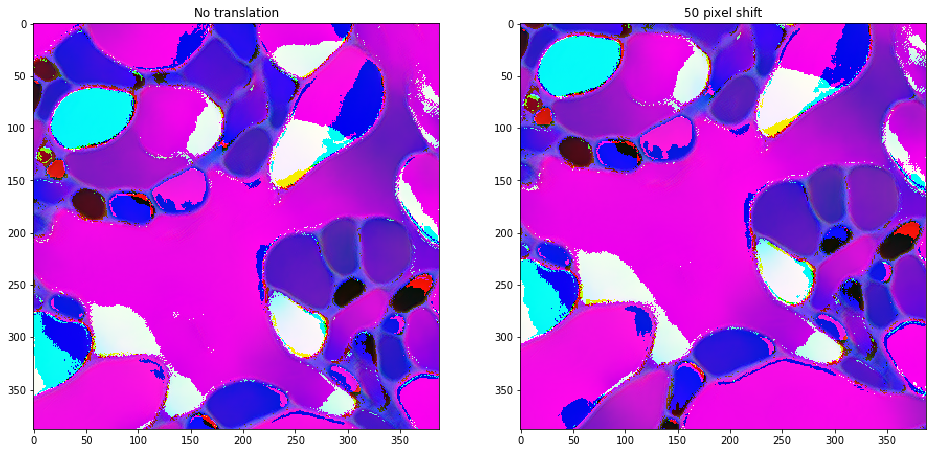

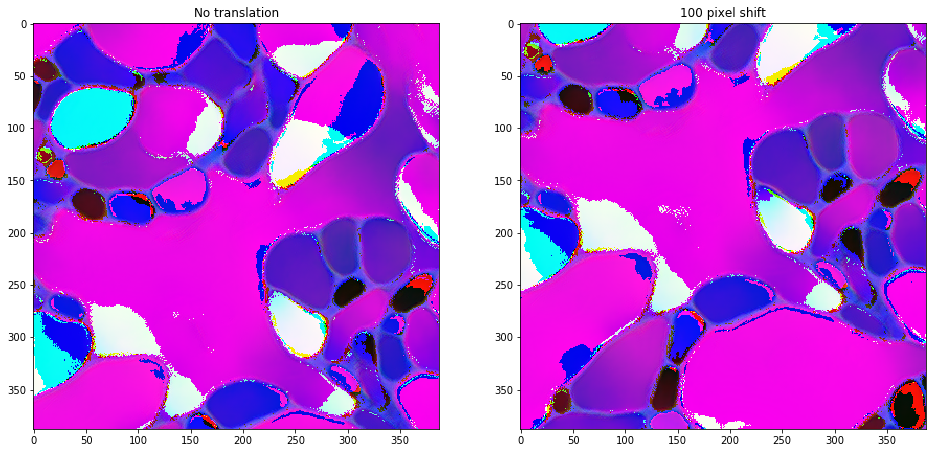

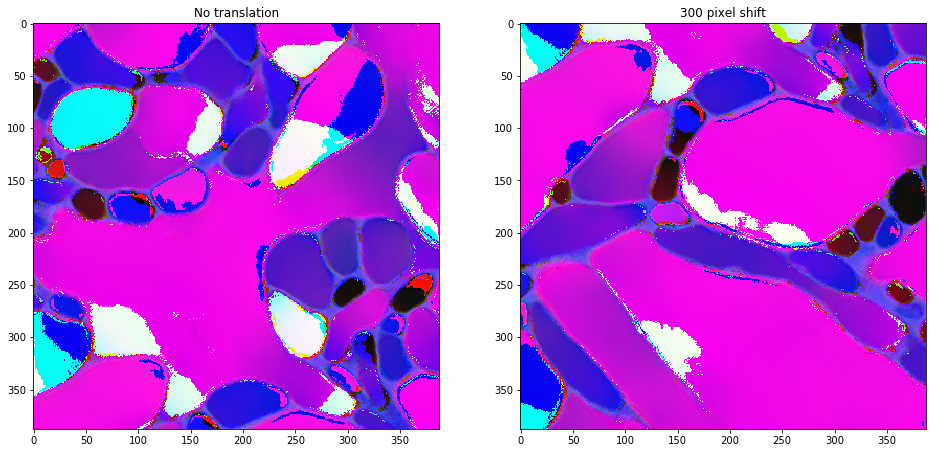

In [20]:
"""Vertical Translations"""
# Get 4 shifted images in x 
im1 = em_imgs_dev[-1, 0:572, 0:572]
delta = 50
im2 = em_imgs_dev[-1, 0+delta:572+delta, 0:572]
delta = 100
im3 = em_imgs_dev[-1, 0+delta:572+delta, 0:572]
delta = 300
im4 = em_imgs_dev[-1, 0+delta:572+delta, 0:572]

# Compute vectors for each image
vec1 = utils.generate_vector_labels(inputs, outputs, im1, sess)
vec2 = utils.generate_vector_labels(inputs, outputs, im2, sess)
vec3 = utils.generate_vector_labels(inputs, outputs, im3, sess)
vec4 = utils.generate_vector_labels(inputs, outputs, im4, sess)

# Show vectors 
plt.figure(figsize=(16,8))
plt.subplot(121)
plt.title('No translation')
plt.imshow(vec1[:,:,0:3]); 
plt.subplot(122)
plt.title('50 pixel shift')
plt.imshow(vec2[:,:,0:3]); plt.show()

plt.figure(figsize=(16,8))
plt.subplot(121)
plt.title('No translation')
plt.imshow(vec1[:,:,0:3]); 
plt.subplot(122)
plt.title('100 pixel shift')
plt.imshow(vec3[:,:,0:3]); plt.show()

plt.figure(figsize=(16,8))
plt.subplot(121)
plt.title('No translation')
plt.imshow(vec1[:,:,0:3]); 
plt.subplot(122)
plt.title('300 pixel shift')
plt.imshow(vec4[:,:,0:3]); plt.show()

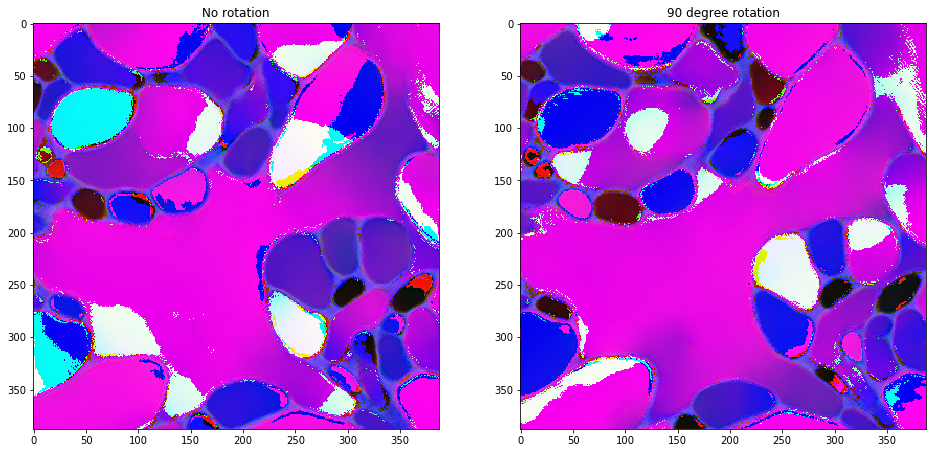

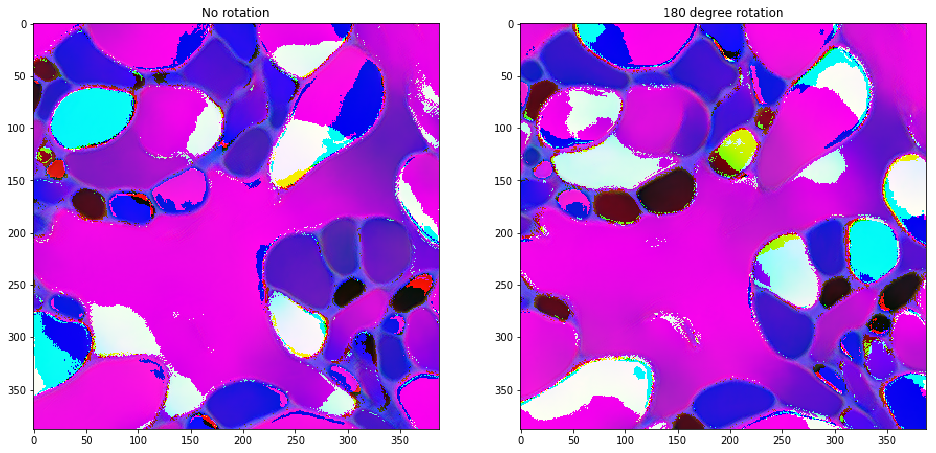

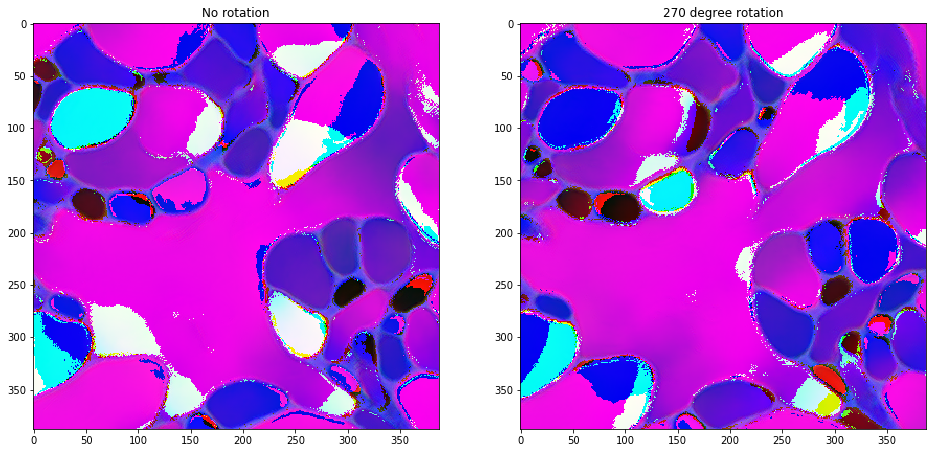

In [19]:
"""Rotations"""
# Get 4 rotated images
im1 = em_imgs_dev[-1, 0:572, 0:572]
im2 = np.rot90(im1)
im3 = np.rot90(im2)
im4 = np.rot90(im3)

# Compute vectors for each image
vec1 = utils.generate_vector_labels(inputs, outputs, im1, sess)
vec2 = utils.generate_vector_labels(inputs, outputs, im2, sess)
vec3 = utils.generate_vector_labels(inputs, outputs, im3, sess)
vec4 = utils.generate_vector_labels(inputs, outputs, im4, sess)

# Rotate vector-fields back into original image
vec2 = np.rot90(vec2, -1)
vec3 = np.rot90(vec3, -2)
vec4 = np.rot90(vec4, -3)

# Show vectors 
plt.figure(figsize=(16,8))
plt.subplot(121)
plt.title('No rotation')
plt.imshow(vec1[:,:,0:3]); #plt.show()
plt.subplot(122)
plt.title('90 degree rotation')
plt.imshow(vec2[:,:,0:3]); plt.show()

plt.figure(figsize=(16,8))
plt.subplot(121)
plt.title('No rotation')
plt.imshow(vec1[:,:,0:3]);
plt.subplot(122)
plt.title('180 degree rotation')
plt.imshow(vec3[:,:,0:3]); plt.show()

plt.figure(figsize=(16,8))
plt.subplot(121)
plt.title('No rotation')
plt.imshow(vec1[:,:,0:3]);
plt.subplot(122)
plt.title('270 degree rotation')
plt.imshow(vec4[:,:,0:3]); plt.show()